#Transfer Learning



In [ ]:
import numpy as np
import cv2
import PIL.Image  as Image
import os
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
               input_shape = IMAGE_SHAPE+(3,))
])

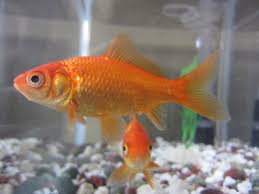

In [ ]:
input = Image.open('/content/g1.jpeg')
input

In [ ]:
input = np.array(input.resize(IMAGE_SHAPE))/255.0
input.shape

(224, 224, 3)

In [ ]:
gold_fish = input[np.newaxis, ...]
gold_fish.shape

(1, 224, 224, 3)

In [ ]:
result = classifier.predict([gold_fish])
result.shape

1/1 [==============================] - 1s 708ms/step


(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
image_labels =[]
with open("ImageNetLabels.txt","r") as f:
  image_labels = f.read().splitlines()

image_labels[:5]


['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

flower classification using pretrained model

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos",origin = dataset_url,cache_dir='.',untar=True)


228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob("*/*.jpg"))[:5]
# list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/5067864967_19928ca94c_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/1217254584_4b3028b93d.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14925397651_97dcddc383_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20667988875_6e73ac2879_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/22183521655_56221bf2a4_n.jpg')]

In [ ]:
image_count = list(data_dir.glob('*/*.jpg'))
print(len(image_count))

3670


In [ ]:
roses = list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4731069260_b270f47803_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4797595918_79887b1229_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/1540738662_7b4152e344_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9309388105_12c0b8dd54_m.jpg')]

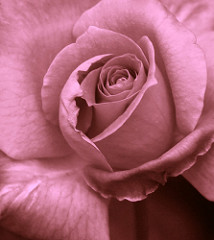

In [ ]:
Image.open(str(roses[3]))

In [ ]:
tulips = list(data_dir.glob("tulips/*"))


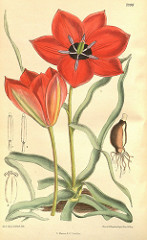

In [ ]:
Image.open(str(tulips[2]))

In [ ]:
flowers_image_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "tulips" : list(data_dir.glob("tulips/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflower" : list(data_dir.glob("sunflowers/*"))
    }

In [ ]:
flowers_labels_dict = {
    "roses" : 0,
    "daisy" : 1,
    "tulips" : 2,
    "dandelion"  : 3,
    "sunflower" : 4
    }

In [ ]:
str(flowers_image_dict["roses"][0])

'datasets/flower_photos/roses/4731069260_b270f47803_n.jpg'

array([[[ 0,  1,  2],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 7, 41, 10],
        [ 0, 34,  2],
        [ 0, 25,  0]],

       [[ 1,  0,  2],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 1, 22,  0],
        [ 0, 23,  1],
        [ 1, 23,  4]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 1,  5,  0],
        [ 2,  6,  0],
        [ 2,  6,  1]],

       ...,

       [[ 0,  8,  1],
        [ 0,  3,  0],
        [ 0,  6,  0],
        ...,
        [ 8, 11,  2],
        [12, 15,  0],
        [14, 15,  0]],

       [[ 0, 13,  7],
        [ 0,  9,  1],
        [ 0, 14,  3],
        ...,
        [ 9, 10,  8],
        [11,  9,  8],
        [ 5,  2,  0]],

       [[ 5, 13,  6],
        [ 0,  9,  0],
        [ 2, 26,  2],
        ...,
        [ 3,  4,  2],
        [ 0,  1,  0],
        [ 4,  5,  3]]], dtype=uint8)
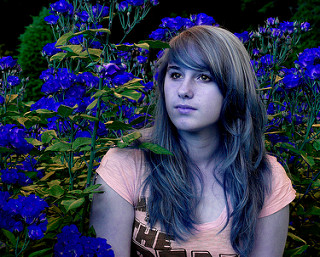

In [ ]:
img = cv2.imread(str(flowers_image_dict["roses"][0]))
img

In [ ]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [ ]:
IMAGE_SHAPE = (224,224)
x, y = [], []

for flower_name, images in flowers_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_image = cv2.resize(img,IMAGE_SHAPE)
    x.append(resized_image)
    y.append(flowers_labels_dict[flower_name])


array([[[30, 28, 28],
        [31, 29, 29],
        [31, 29, 29],
        ...,
        [31, 26, 27],
        [31, 26, 27],
        [32, 27, 28]],

       [[30, 28, 28],
        [31, 29, 29],
        [31, 29, 29],
        ...,
        [32, 27, 28],
        [32, 27, 28],
        [33, 27, 29]],

       [[29, 27, 27],
        [31, 29, 29],
        [31, 29, 29],
        ...,
        [32, 27, 28],
        [33, 28, 29],
        [33, 28, 29]],

       ...,

       [[ 6,  6,  6],
        [ 5,  7,  7],
        [ 8, 10, 10],
        ...,
        [10,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8]],

       [[ 7,  7,  7],
        [ 6,  7,  7],
        [ 5,  7,  7],
        ...,
        [10,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8]],

       [[ 9,  9,  9],
        [ 8,  8,  8],
        [ 7,  7,  7],
        ...,
        [10,  8,  8],
        [ 7,  7,  7],
        [ 8,  8,  8]]], dtype=uint8)
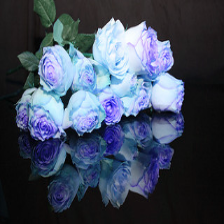

In [ ]:
x[288]

In [ ]:
x[3423]/255

array([[[0.52941176, 0.21568627, 0.        ],
        [0.5254902 , 0.21176471, 0.        ],
        [0.53333333, 0.21960784, 0.00392157],
        ...,
        [0.54901961, 0.23921569, 0.        ],
        [0.53333333, 0.23137255, 0.        ],
        [0.51764706, 0.21176471, 0.        ]],

       [[0.54117647, 0.23137255, 0.00784314],
        [0.54901961, 0.23921569, 0.01568627],
        [0.54901961, 0.24313725, 0.01568627],
        ...,
        [0.55294118, 0.23921569, 0.        ],
        [0.54509804, 0.24313725, 0.        ],
        [0.54117647, 0.23529412, 0.00784314]],

       [[0.54509804, 0.23921569, 0.00784314],
        [0.54117647, 0.23529412, 0.00784314],
        [0.54117647, 0.23529412, 0.00784314],
        ...,
        [0.54509804, 0.23137255, 0.        ],
        [0.54117647, 0.23921569, 0.00392157],
        [0.54901961, 0.23921569, 0.01568627]],

       ...,

       [[0.03137255, 0.13333333, 0.07058824],
        [0.02745098, 0.21176471, 0.09019608],
        [0.04313725, 0

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,random_state=0)

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

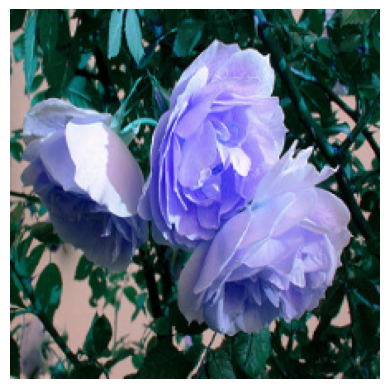

In [ ]:
plt.axis('off')
plt.imshow(x[1])

In [ ]:
# using pretrained model to predict  flower category
classifier.predict(np.array([x[0],x[1],x[3]])) # because it take array to predict

1/1 [==============================] - 0s 491ms/step


array([[ 0.27546164, -0.22329508,  1.067224  , ..., -1.2354133 ,
        -1.7473637 ,  4.6232123 ],
       [ 0.28056088, -0.3738675 ,  1.8530933 , ..., -1.8921204 ,
        -2.170371  ,  4.5863576 ],
       [ 0.18674767,  0.5061438 ,  1.7828535 , ..., -1.3509188 ,
        -2.185479  ,  2.7159836 ]], dtype=float32)

In [ ]:
predicted =  classifier.predict(np.array([x[0],x[1],x[3]]))
predicted = np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 0s 59ms/step


array([722, 795, 722])

In [ ]:
image_labels[880]

'umbrella'

In [ ]:
IMAGE_SHAPE = (224, 224, 3)
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model,input_shape = IMAGE_SHAPE,trainable = False
)#trainale false means no training phase occur

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer  = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True),
    metrics = ["Accuracy"]
)
# model.fit(x_train_scaled,y_train,epochs=5)

In [ ]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 18s 172ms/step - loss: 0.8065 - Accuracy: 0.7046
Epoch 2/5
86/86 [==============================] - 14s 168ms/step - loss: 0.4083 - Accuracy: 0.8637
Epoch 3/5
86/86 [==============================] - 14s 168ms/step - loss: 0.3166 - Accuracy: 0.9015
Epoch 4/5
86/86 [==============================] - 14s 163ms/step - loss: 0.2671 - Accuracy: 0.9219
Epoch 5/5
86/86 [==============================] - 14s 166ms/step - loss: 0.2283 - Accuracy: 0.9324


In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 5s 169ms/step - loss: 0.3656 - Accuracy: 0.8606


[0.3655727505683899, 0.8605664372444153]

In [ ]:
predicted =model.predict(x_test_scaled)

29/29 [==============================] - 5s 183ms/step


In [ ]:
results = []
for i in predicted:
  results.append(np.argmax(i))

In [ ]:
results[10:20]

[3, 0, 2, 4, 3, 3, 0, 4, 1]

In [ ]:
y_test[10:20]

array([1, 3, 2, 3, 3, 2, 1, 1, 0, 2])